# Conclusiones

* Se usaron 7 modelos de Machine Learning para predecir si una misión tendrá éxito o fracaso basada en el país de lanzamiento, la compañía espacial, el costo, entre otros.

* El modelo que se ajustó mejor a los datos fue K-nearest neighbors. Obtuvo un puntaje de 0.9 y un F1-score de 0.87, es decir, predijo correctamente el 87% del éxito o fracaso de las misiones.

## Información adicional:

* El dataset inicial tiene 4324 registros y 7 columnas. 
* El 89.9% de las misiones espaciales fueron un éxito. 
* Solo el 18.3% de los cohetes usados en misiones siguen activos.
* Los países con más misiones son Rusia, USA y Kazakhstan.
* Entre 1965 y 1976 es donde más misiones se han lanzado.
* Las compañías que más misiones exitosas han lanzado son RVSN URSS, Arianespace y CASC.
* Los países que más dinero han invertido en misiones son USA, Rusia y Kazakhstan.
* Típicamente n los meses de noviembre y diciembre se lanzan misiones con mayor costo.


### Librerías

In [215]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

### Lectura y preprocesamiento de datos

In [216]:
df = pd.read_csv('mission_launches.csv').drop(columns=['Unnamed: 0.1','Unnamed: 0'])

df.rename(columns={'Company Name':'company',
                   'Location':'launch_spot',
                   'Datum':'date',
                   'Detail':'detail',
                   'Status Rocket':'rocket_status',
                   ' Rocket':'cost',
                   'Status Mission':'mission_status'},
          inplace=True)

##-----Verificar cuántos valores nulos y/o duplicados hay

def missing_values(df):
    doubles = df.duplicated().sum()
    size = df.shape[0]
    print(f'El conjunto de datos tiene {size} registros, {df.shape[1]} columnas y {doubles} valores duplicados'.center(80,'-'))
    print('')
    df = df.drop_duplicates()
    for i,col in enumerate(df):
        missing = df[col].isna().sum()
        missing_percentage = missing/size*100

        print(f'La columna {col} tiene --> {missing} valores nulos equivalentes al --> {missing_percentage:.2f}% <-- del total de datos.')
    return df

df = missing_values(df)

--El conjunto de datos tiene 4324 registros, 7 columnas y 1 valores duplicados--

La columna company tiene --> 0 valores nulos equivalentes al --> 0.00% <-- del total de datos.
La columna launch_spot tiene --> 0 valores nulos equivalentes al --> 0.00% <-- del total de datos.
La columna date tiene --> 0 valores nulos equivalentes al --> 0.00% <-- del total de datos.
La columna detail tiene --> 0 valores nulos equivalentes al --> 0.00% <-- del total de datos.
La columna rocket_status tiene --> 0 valores nulos equivalentes al --> 0.00% <-- del total de datos.
La columna cost tiene --> 3360 valores nulos equivalentes al --> 77.71% <-- del total de datos.
La columna mission_status tiene --> 0 valores nulos equivalentes al --> 0.00% <-- del total de datos.


### Información inicial

* El dataset tiene 4324 registros y 7 columnas. 
* La columna con el costo de cada misión tiene 77.71% de datos nulos. 
* Se tomarán el escenario donde se reemplazan esos valores nulos con el promedio.


In [217]:
##-----Conversión de datos


#-----Eliminar 'UTC' de la columna date

df['date'] = df['date'].str.replace(' UTC','')

#-----La columna date tiene datos de tipo date y de tipo datetime. Es necesario hacer la conversión

def date_conversion(x):
    if ':' in x:
        return pd.to_datetime(x,format='%a %b %d, %Y %H:%M')
    else:
        return pd.to_datetime(x,format='%a %b %d, %Y')
    
df['date'] = df['date'].apply(date_conversion)


#-----La columna cost es tipo string y tiene espacios vacíos y comas. Es necesario eliminar los espacios vacios y las comas antes de convertir a numero.


df['cost'] = df['cost'].str.replace(' ','')
df['cost'] = df['cost'].str.replace(',','')
df['cost'] = df['cost'].astype(np.float32)

#-----Reemplazar valores nulos
df['cost'] = df['cost'].fillna(df['cost'].mean())

#-----Obtención de medidas derivadas

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
#-----Organizar los datos por fecha

df = df.sort_values(by='date').reset_index(drop=True)

##Soltar la columna de fechas
df = df.drop(columns='date')

#-----Obtener el país de lanzamiento de cada misión

df['launch_spot'] = df['launch_spot'].str.split(', ').str[-1]


#-----La columna detail tiene el nombre del cohete y la carga que lleva. Hay que dividirla

df[['rocket','load']] = df['detail'].str.split('|',expand=True)
df = df.drop(columns='detail')


#-----La columna del lugar de lanzamiento tiene algunos lugares que no indican explícitamente el país. Deben ser reemplazados.

changes = {'New Mexico':'USA',
    "Yellow Sea":'China',
    "Shahrud Missile Test Site":'Iran',
    "Pacific Missile Range Facility":'USA',
    "Barents Sea":'Russia',
    "Gran Canaria":'USA'
}

df['launch_spot'] = df['launch_spot'].replace(changes)




##Optimizar el codigo borrando variables que ya no serán usadas
del  changes

## Estilos estéticos

In [218]:
#-------------------------Estilos para los gráficos
import matplotlib as mpl
plt.style.use("fivethirtyeight") 
mpl.rcParams["figure.facecolor"]="white"
mpl.rcParams["axes.facecolor"]="white"
mpl.rcParams["font.family"]="serif"
mpl.rcParams["axes.edgecolor"]="0.2"

mpl.rcParams["font.size"]=10.5 
mpl.rcParams["legend.fontsize"]=14
mpl.rcParams["font.weight"]="bold"
mpl.rcParams["legend.fancybox"]=True
mpl.rcParams["xtick.labelsize"]=10
mpl.rcParams["ytick.labelsize"]=12
mpl.rcParams["figure.titleweight"]="bold"
mpl.rcParams["axes.labelweight"]="bold"
mpl.rcParams["axes.linewidth"]=1
mpl.rcParams["axes.titleweight"]="bold"
mpl.rcParams["axes.labelsize"]=16
mpl.rcParams["figure.titlesize"]=20
mpl.rcParams["axes.titlesize"]=25
mpl.rcParams["figure.labelsize"]=16
mpl.rcParams["figure.labelweight"]="bold"
mpl.rcParams['axes.grid']=False


### Análisis exploratorio de datos

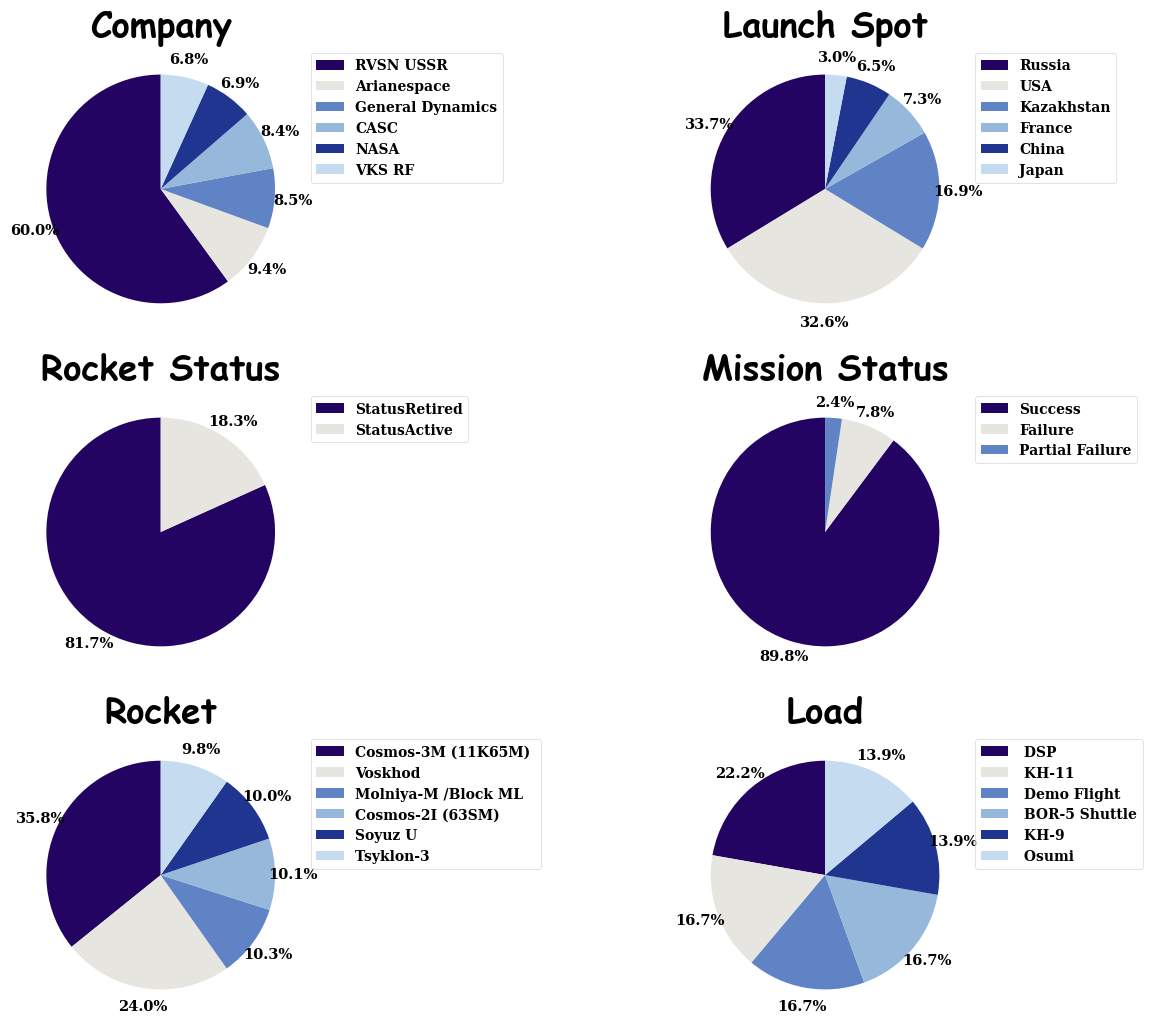

In [219]:
#-----Distribución de los datos categóricos
cat = df.select_dtypes('O')

fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(14,12))
ax = ax.flat

colors = ['#230462','#e6e5e0','#6083c5','#96b8db','#203590','#c5dbf0','#76949f']
for i, col in enumerate(cat):
    if col!='mission_status':
        cat[col].value_counts(sort=True).head(6).plot(kind='pie',ax=ax[i],
                        autopct='%.1f%%',labeldistance=None,pctdistance=1.16,
                        radius=1,startangle=90,colors=colors)
    else:
        cat[col].value_counts(sort=True).head(3).plot(kind='pie',ax=ax[i],
                        autopct='%.1f%%',labeldistance=None,pctdistance=1.14,
                        radius=1,startangle=90,colors=colors)
    ax[i].set_ylabel('')
    ax[i].set_title(f'{col}'.title().replace('_',' '),fontfamily='cursive')
    ax[i].legend(bbox_to_anchor=(1,1),fontsize=10)

plt.show()

##Optimizar el codigo borrando variables que ya no serán usadas
del  cat

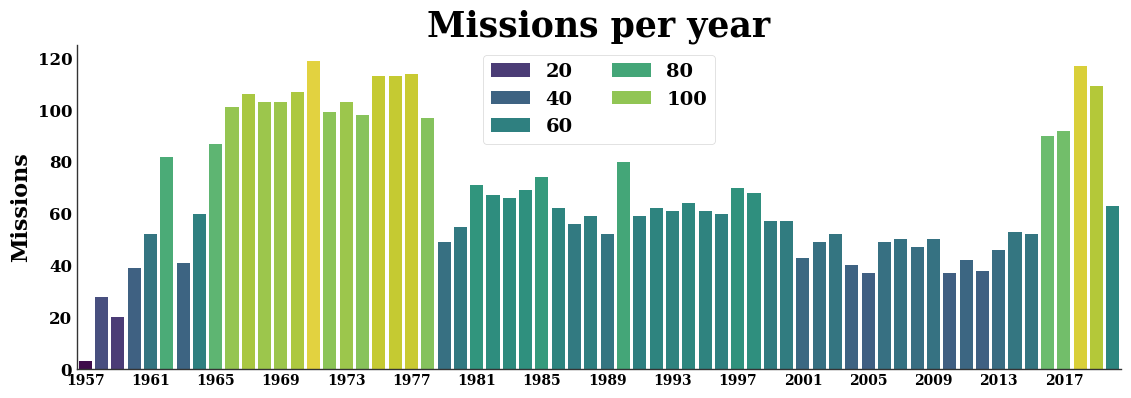

In [220]:
#-----Misiones por año

fig, ax = plt.subplots(figsize=(12,4))

missions_per_year = df.groupby('year')['rocket'].count().reset_index()

bar = sns.barplot(data=missions_per_year,x='year',y='rocket',ax=ax,hue='rocket',palette='viridis',legend='auto')
# ##Etiquetas
# # for container in bar.containers:
# #     ax.bar_label(container,fontsize=9,rotation=0,padding=10,label_type='edge',bbox=dict(facecolor='w',boxstyle='round,pad=0.15',edgecolor='k'),)

ax.set_title('Missions per year')
ax.set_xlabel('')
ax.set_ylabel('Missions')
ax.legend(ncols=2)
ticks = np.arange(0,missions_per_year.shape[0],4)
labels = missions_per_year.iloc[::4,0]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax.spines[['top','right']].set_visible(False)


##Optimizar el codigo borrando variables que ya no serán usadas
del  missions_per_year,ticks,labels,bar

In [221]:
# ingredientes = ['ml de agua', 'gramos de tomate', 'gramos de cebolla', 
#                 'gramos de pepino', 'gramos de uranio', 'gramos de ayudante_de_santa', 
#                 'gramos de coliflor', 'gramos de avena']

# cantidades_gramos = [100,150,200,300,400,50]
# productos = ['Salsa de arandanos baja en grasa','Salsa de arandanos baja en salsa','salsa de pepino alta en piña','pechuga alta en cerdo']

# producto = input('Ingrese el producto: ')

# for i in range(len(productos)):
#     if 'arandanos baja en grasa' in productos[i]:
#         print(f'El producto es {productos[i]}.'.center(60,'-'))
#         print(f'Los ingredientes son: {list(zip(cantidades_gramos[1:7:2],ingredientes[1:7:2]))}')
#         break
#     elif 'alta en piña' in productos[i]:
#         print(f'El producto es {productos[i]}.'.center(60,'-'))
#         print(f'Los ingredientes son: {list(zip(cantidades_gramos[1:7:2],ingredientes[1:7:2]))}')

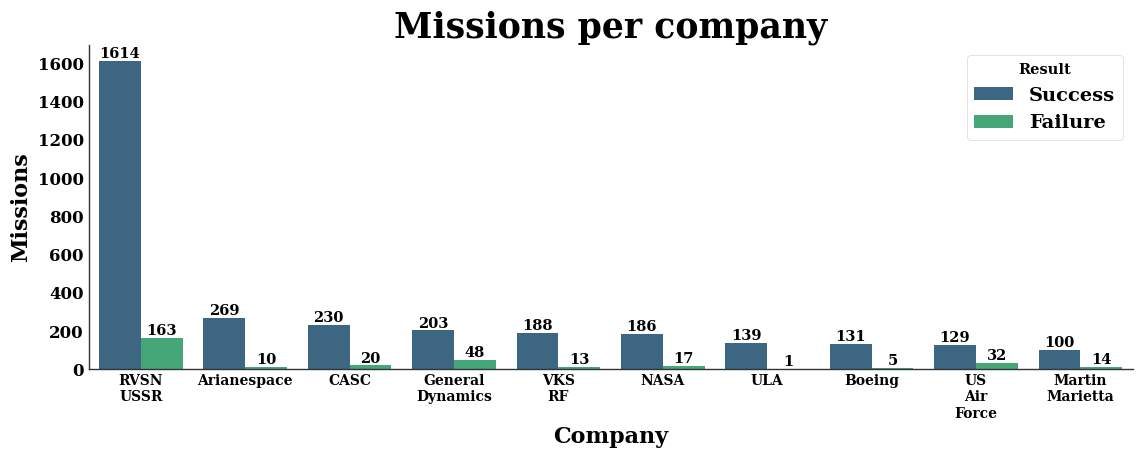

In [222]:
##Misiones por compañías con más misiones y resultado de la mision

##Creamos una nueva columna con éxito o fracaso de la misión
df['success'] = df['mission_status'].apply(lambda x:'Success' if x=='Success' else 'Failure')

##Determinar cuales son las compañias con más misiones
more_missions = df['company'].value_counts(sort=True).head(10).index
companies_missions = df.loc[df['company'].isin(more_missions)].groupby(['company','success'])['rocket'].count().reset_index().sort_values(by='rocket',ascending=False)


fig, ax = plt.subplots(figsize=(12,4))
bar = sns.barplot(data=companies_missions,x='company',y='rocket',hue='success',errorbar=None,palette='viridis')

for container in bar.containers:
    ax.bar_label(container)

labels = [i.replace(' ','\n') for i in companies_missions['company'].unique()]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_xlabel('Company')
ax.set_ylabel('Missions')
ax.set_title('Missions per company')
ax.legend(title='Result')
ax.spines[['top','right']].set_visible(False)
plt.show()

##Optimizar el codigo borrando variables que ya no serán usadas
del  more_missions,companies_missions

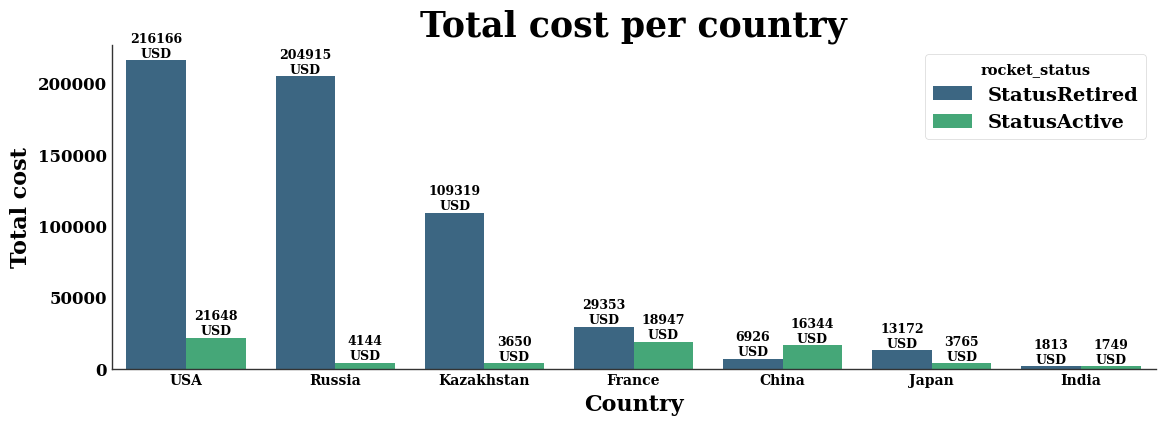

In [223]:
##Mayores costos totales de las misiones por país


##paises que más han gastado
more_cost = df.groupby(['launch_spot'])['cost'].sum().sort_values(ascending=False).head(8).drop(index='Pacific Ocean').index
total_cost = df.loc[df['launch_spot'].isin(more_cost)].groupby(['launch_spot','rocket_status'])['cost'].sum().reset_index().sort_values(by='cost',ascending=False)

fig, ax = plt.subplots(figsize=(12,4))
bar= sns.barplot(data=total_cost,x='launch_spot',y='cost',errorbar=None,hue='rocket_status',palette='viridis')

for container in bar.containers:
    ax.bar_label(container,fmt=lambda x:f'{x:.0f}\nUSD',fontsize=9)
ax.spines[['top','right']].set_visible(False)

ax.set_xlabel('Country')
ax.set_ylabel('Total cost')
ax.set_title('Total cost per country')

plt.show()

del bar, more_cost,total_cost

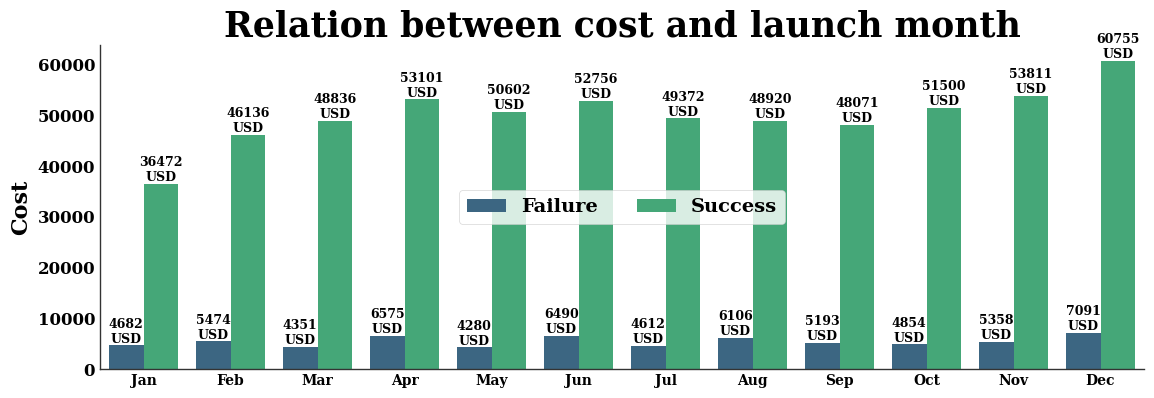

In [224]:
month_success = df.groupby(['month','success'])['cost'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,4))

bar = sns.barplot(data=month_success,x='month',y='cost',hue='success',errorbar=None,palette='viridis')

for container in bar.containers:
    ax.bar_label(container,fmt=lambda x:f'{x:.0f}\nUSD',fontsize=9)
ax.spines[['top','right']].set_visible(False)
ax.legend(ncols=2,loc='center')
ax.set_xlabel('')
ax.set_title('Relation between cost and launch month')
ax.set_ylabel('Cost')

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.show()

del bar, month_success

## Proceso de Machine Learning

In [225]:
##Preparación de los datos.

##Debemos ver qué cantidad de valores únicos tiene cada feature categórica.

cat = df.select_dtypes('O')

for i,col in enumerate(cat):
    print(f'La columna {col} tiene {cat[col].nunique()} valores únicos')

##La columna load tiene 4257 valores únicos. Solo va a generar ruido por lo cual será descartada

df_l = df.drop(columns='load')

cat = df_l.select_dtypes('O')

##Debido a la gran cantidad de valores únicos podemos hacer 2 cosas:
#1 - Trabajar con todos los valores únicos y usar labelencoder. 
#2 - Tomar los valores únicos con más apariciones y categorizar los demás en "Otros" y usar OneHotEncoder.

##Veamos la distribución de los datos únicos

for i,col in enumerate(cat):
    porcentaje_unicos = (cat[col].value_counts(sort=True,normalize=True)*100).round(1).head(10)
    print(f'\nLa columna {col} se distribuye así:\n{porcentaje_unicos}')

##Las categorías no tienen una distribución uniforme por lo cual:
    #Vamos a conservar los valores con más apariciones y a categorizar los demás como "Otros"
    #La cantidad de valores únicos por columnas será:
        #: 5 --> RVSN USSR , Arianespace, General Dynamics, CASC y  NASA 
        #launch_companyspot: 5 --> Russia, USA, Kazakhstan, France y China
        #mission_status: ya se encuentra clasificada en la columna succes, pero hagamos que sea de True y False
        #rocket: No será tomada en cuenta

df2 = df_l.drop(columns = ['mission_status','rocket'])
del df_l

La columna company tiene 56 valores únicos
La columna launch_spot tiene 16 valores únicos
La columna rocket_status tiene 2 valores únicos
La columna mission_status tiene 4 valores únicos
La columna rocket tiene 352 valores únicos
La columna load tiene 4257 valores únicos
La columna success tiene 2 valores únicos

La columna company se distribuye así:
company
RVSN USSR           41.1
Arianespace          6.5
General Dynamics     5.8
CASC                 5.8
NASA                 4.7
VKS RF               4.6
US Air Force         3.7
ULA                  3.2
Boeing               3.1
Martin Marietta      2.6
Name: proportion, dtype: float64

La columna launch_spot se distribuye así:
launch_spot
Russia           32.3
USA              31.3
Kazakhstan       16.2
France            7.0
China             6.2
Japan             2.9
India             1.8
Pacific Ocean     0.8
Iran              0.3
New Zealand       0.3
Name: proportion, dtype: float64

La columna rocket_status se distribuye así:
roc

In [226]:
##Recategorizar

top_companies = df2['company'].value_counts(sort=True).head(5).index
top_launch_spot = df2['launch_spot'].value_counts(sort=True).head(5).index

df2['company'] = df2['company'].apply(lambda x:x if x in top_companies else 'Other companies')
df2['launch_spot'] = df2['launch_spot'].apply(lambda x:x if x in top_launch_spot else 'Other countries')
df2['success'] = df2['success'].apply(lambda x: True if x=='Success' else False)

##Ahora sí, hacemos OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
cat = df2.select_dtypes('O')

coded = encoder.fit_transform(cat[cat.columns])

df_coded = pd.DataFrame(coded,columns=encoder.get_feature_names_out())
df_dummie = pd.concat([df2.drop(columns=cat.columns),df_coded],axis=1)

del coded,cat, df_coded,df2,top_companies,top_launch_spot

<Axes: >

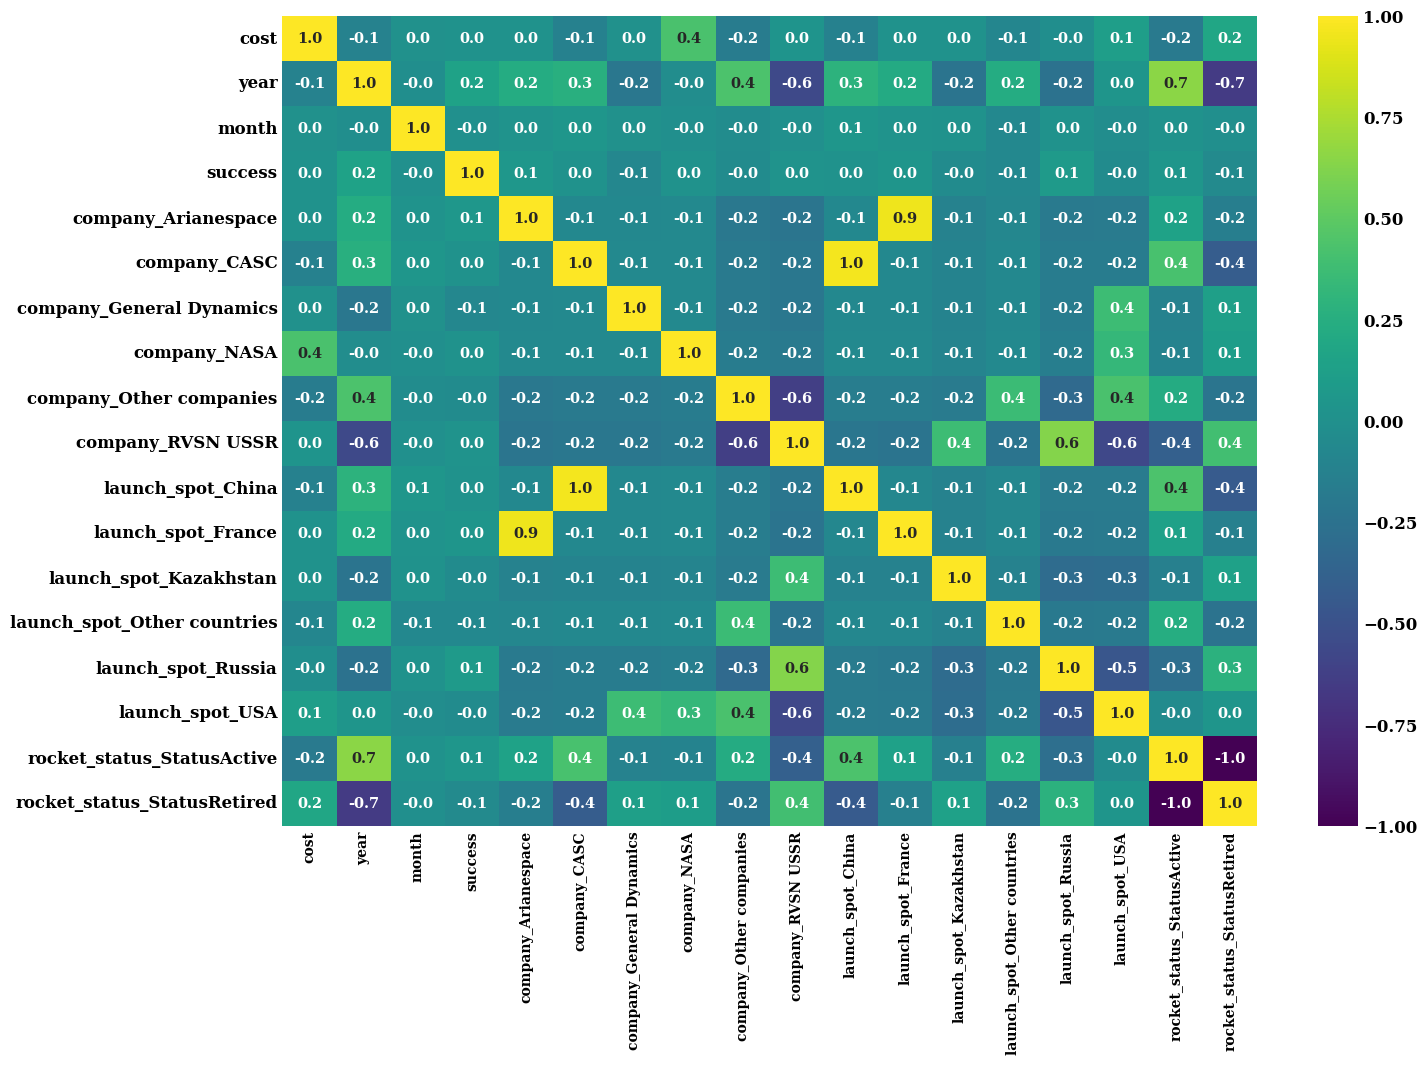

In [227]:
##Correlaciones entre las variables

corr = df_dummie.corr()

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(data=corr,annot=True,cmap='viridis',fmt='.1f')

## Inicia la modelación con Machine Learning

In [228]:
##Vamos a predecir si una misión tendrá éxito o fracaso a partir de las demás variables. Problema de clasificación.

x = df_dummie.drop(columns=['success'])
y = df_dummie['success']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

##Modelos

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB


##Métricas
from sklearn.metrics import recall_score, precision_score, f1_score

metodo = 'weighted'

modelos ={
    'Logistic Regression':LogisticRegression(n_jobs=-1),
    'KNN':KNeighborsClassifier(n_jobs=-1),
    'SVC':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(n_jobs=-1),
    'Gaussian NB':GaussianNB(),
    'Complement NB':ComplementNB()
}

def evaluar_modelos(models=modelos):

    best_score = 0
    best_model = None
    for name, model in models.items():
        y_pred = model.fit(x_train,y_train).predict(x_test)
        recall = recall_score(y_test,y_pred,average=metodo)
        precision = precision_score(y_test,y_pred,average=metodo,zero_division=1)
        f1 = f1_score(y_test,y_pred,average=metodo)

        print(f'El modelo {name} tiene los puntajes:\nf1-->{f1:.2f} - recall-->{recall:.2f} - precision-->{precision:.2f}')
        if f1>best_score:
            best_score = f1
            best_model = model
        else:
            best_score = best_score
            best_model = best_model
    print(f'\nEl mejor modelo es {best_model} con un f1: {best_score}')
    return best_model

model = evaluar_modelos()

El modelo Logistic Regression tiene los puntajes:
f1-->0.85 - recall-->0.90 - precision-->0.91
El modelo KNN tiene los puntajes:
f1-->0.87 - recall-->0.90 - precision-->0.88
El modelo SVC tiene los puntajes:
f1-->0.85 - recall-->0.90 - precision-->0.91
El modelo Decision Tree tiene los puntajes:
f1-->0.85 - recall-->0.84 - precision-->0.86
El modelo Random Forest tiene los puntajes:
f1-->0.87 - recall-->0.88 - precision-->0.85
El modelo Gaussian NB tiene los puntajes:
f1-->0.77 - recall-->0.72 - precision-->0.86
El modelo Complement NB tiene los puntajes:
f1-->0.59 - recall-->0.50 - precision-->0.86

El mejor modelo es KNeighborsClassifier(n_jobs=-1) con un f1: 0.8745557517626881


## Ajuste de hiperpámetros para mejorar el rendimiento

In [229]:
from sklearn.model_selection import GridSearchCV

grilla = {
    # 'algorithm': 'auto',
 'leaf_size': np.arange(20,50,5),
#  'metric': 'minkowski',
 'n_neighbors': np.arange(5,20,2),
 'p': np.arange(1,4),
 'weights': ['uniform','distance']
}

def ajuste_grilla(model=model, grilla=grilla):
    grid = GridSearchCV(estimator=model, param_grid=grilla,cv=3,verbose=2)
    grid.fit(x_train,y_train)
    print(f'El mejor puntaje es {grid.best_score_:.2f}')
    print(f'\nLos mejores parámetros son: {grid.best_params_}')

    #generar prediccion

    y_pred = grid.best_estimator_.fit(x_train,y_train).predict(x_test)

    f1 = f1_score(y_test,y_pred,average=metodo)

    print(f'El mejor F1 es: {f1:.2f}')
    return grid.best_estimator_

model = ajuste_grilla()

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END ..leaf_size=20, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ..leaf_size=20, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ..leaf_size=20, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END .leaf_size=20, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END .leaf_size=20, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END .leaf_size=20, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ..leaf_size=20, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END ..leaf_size=20, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END ..leaf_size=20, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END .leaf_size=20, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END .leaf_size=20, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END .leaf_size=20, n_neighbors=5, p=2, we